### Avinash Singh 2011MC04

#### Import Libraries

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [41]:
from keras.models import Sequential
from keras.layers import Dense

In [42]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

#### Loading Dataset

In [43]:
df=pd.read_csv('diabetes.csv')

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Preprocessing

In [45]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
" Conclusion: Dataset is Free From NaN Values "

' Conclusion: Dataset is Free From NaN Values '

#### Splitting the Input Features and Target Features

In [47]:
X = df.drop('Outcome', 1)
y = df[['Outcome']]

#### One Hot Encoding of the Target Feature

In [48]:
columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder='passthrough')

In [49]:
y = np.array(columnTransformer.fit_transform(y), dtype = np.str) 

In [50]:
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [51]:
y.shape

(768, 2)

#### Train-Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#### Model Building

In [53]:
model = Sequential()
model.add(Dense(500, input_dim=8, activation='sigmoid') )
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train,y_train, epochs=1000, batch_size=70, validation_data=(X_test, y_test))

Train on 614 samples, validate on 154 samples
Epoch 1/1000
614/614 [==============================] - 1s 857us/step - loss: 0.2358 - accuracy: 0.6270 - val_loss: 0.2070 - val_accuracy: 0.6753
Epoch 2/1000
614/614 [==============================] - 0s 274us/step - loss: 0.2122 - accuracy: 0.6531 - val_loss: 0.1945 - val_accuracy: 0.7208
Epoch 3/1000
614/614 [==============================] - 0s 206us/step - loss: 0.2088 - accuracy: 0.6694 - val_loss: 0.1991 - val_accuracy: 0.6623
Epoch 4/1000
614/614 [==============================] - 0s 196us/step - loss: 0.2004 - accuracy: 0.6971 - val_loss: 0.1887 - val_accuracy: 0.7338
Epoch 5/1000
614/614 [==============================] - 0s 259us/step - loss: 0.1999 - accuracy: 0.7036 - val_loss: 0.1931 - val_accuracy: 0.7468
Epoch 6/1000
614/614 [==============================] - 0s 239us/step - loss: 0.1948 - accuracy: 0.6889 - val_loss: 0.1818 - val_accuracy: 0.7597
Epoch 7/1000
614/614 [==============================] - 0s 226us/step - loss: 

#### Model Summary

In [54]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               4500      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 202       
Total params: 54,802
Trainable params: 54,802
Non-trainable params: 0
_________________________________________________________________
None


#### Analysis

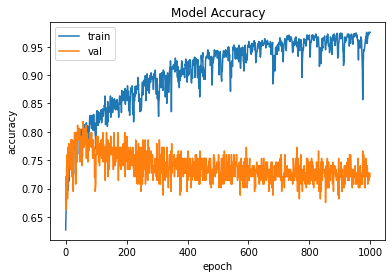

In [55]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

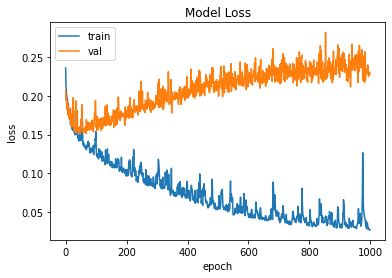

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Accuracy

In [57]:
# evaluate the model
_,train_acc =model.evaluate(X_train,y_train,verbose=0)
_,test_acc  =model.evaluate(X_test,y_test, verbose=0)
print('Training Accuracy :',train_acc)
print('Testing Accuracy :',test_acc)


Training Accuracy : 0.9739413857460022
Testing Accuracy : 0.7207792401313782


In [58]:
# predict classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)


In [59]:
yhat_classes=list(yhat_classes)
#yhat_classes

In [60]:
#Since we had done one hot encoding of the target feature.
#We now convert it back to its original form for compatibility.
y_test2=y_test.tolist()
y_test3=[]
for i in y_test2:
    if(i[0]=='0.0'):
        y_test3.append(1)
    else:
        y_test3.append(0)

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

#### Accuracy

In [62]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test3, yhat_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.720779


#### Precision

In [63]:
# precision tp / (tp + fp)
precision = precision_score(y_test3, yhat_classes)
print('Precision: %f' % precision)

Precision: 0.591837


#### Recall 

In [64]:
# recall: tp / (tp + fn)
recall = recall_score(y_test3, yhat_classes)
print('Recall: %f' % recall)

Recall: 0.557692


#### F1-Score

In [65]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test3, yhat_classes)
print('F1 score: %f' % f1)

F1 score: 0.574257


#### Classification Report


In [68]:
target_names=[0,1]

In [69]:
print(classification_report(y_test3, yhat_classes, target_names))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       102
           1       0.59      0.56      0.57        52

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.72      0.72      0.72       154

